In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import importlib
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import CleanData, SaveState
from CleanData import clean_comment, get_bag_of_words


# Load all article reviews from MediaBiasChart V5.0:
media_bias = pd.read_csv('../data/MediaBiasChart.csv')
media_bias = media_bias.groupby('Source').mean()
media_bias.reset_index(level=0, inplace=True)

MediaBiasChart_to_Tweet = {'ABC':'ABC','AP':'AP','Axios':'axios','CNN':'CNN','Wall Street Journal':'WSJ',\
    'The Atlantic':'TheAtlantic','The Hill':'thehill', 'BBC':'BBC', 'Think Progress':'thinkprogress',\
    'MSNBC':'MSNBC','The Nation':'thenation','Daily Beast':'thedailybeast','Mother Jones':'MotherJones',\
    'CNSNews':'cnsnews','Fox News':'FoxNews', 'The Federalist':'FDRLST','Breitbart':'BreitbartNews',\
    'Daily Caller':'DailyCaller','The Blaze':'theblaze','Business Insider':'businessinsider',\
    'CBS':'CBSNews','The Economist':'TheEconomist','BuzzFeed':'BuzzFeed','Daily Signal':'DailySignal',\
    'New Republic':'newrepublic','Foreign Policy':'ForeignPolicy','IJR':'TheIJR','National Review':'NRO',\
    'National Public Radio':'NPR','New York Post':'nypost','New York Times':'nytimes','The New Yorker':'NewYorker',\
    'NewsMax':'newsmax','One America News Network':'OANN','Politico':'politico','Quartz':'qz',\
    'Reason':'reason','Reuters':'Reuters','Slate':'Slate','Talking Points Memo':'TPM','Vanity Fair':'VanityFair',\
    'Vox':'voxdotcom','Washington Examiner':'dcexaminer','Washington Free Beacon':'FreeBeacon',\
    'Washington Post':'washingtonpost','Washington Times':'WashTimes','The Week':'TheWeek','Bloomberg':'Bloomberg',\
    'Christian Science Monitor':'csmonitor', 'Democracy Now':'democracynow','Financial Times':'FT',\
    'Fiscal Times':'TheFiscalTimes','Forbes':'Forbes','Fortune':'FortuneMagazine','Forward':'jdforward',\
    'FreeSpeech TV':'freespeechtv','Huffington Post':'HuffPost','LA Times':'latimes','Marketwatch':'MarketWatch',\
    'OZY':'ozy','PBS':'PBS','ProPublica':'propublica','Time':'TIME','USA Today':'USATODAY',\
    'Weather.com':'weatherchannel'}

media_bias['Source'] = media_bias.Source.map(MediaBiasChart_to_Tweet)
media_bias = media_bias.dropna()
media_bias.reset_index(drop=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zchao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Source,Bias,Quality
0,ABC,-1.846000,49.866500
1,AP,-1.063261,52.189130
2,axios,-5.737857,47.303571
3,BBC,-3.033333,46.266667
4,Bloomberg,-0.850345,47.522759
...,...,...,...
60,dcexaminer,12.166250,35.485000
61,FreeBeacon,16.708125,36.187500
62,washingtonpost,-4.179888,44.567303
63,WashTimes,12.966667,37.228000


In [2]:
media_bias.to_csv('../data/Media_coordinate.csv',index=False)

In [3]:
# df1 = pd.read_csv('../data/filtered_part1.csv', skiprows=1)
# df2 = pd.read_csv('../data/filtered_part2.csv')
# df3 = pd.read_csv('../data/filtered_part3.csv')
# df4 = pd.read_csv('../data/filtered_part4.csv',lineterminator='\n')
# df6 = pd.read_csv('../data/filtered_part6.csv')
# df7 = pd.read_csv('../data/filtered_part7.csv')
# df8 = pd.read_csv('../data/filtered_part8.csv')
# df = pd.concat([df1, df2, df3, df4, df6, df7, df8], sort = False)

# all_media = media_bias['Source'].tolist()
# df = df.loc[df['user_screen_name'].isin(all_media)]
# df = df.drop(columns=['hashtags','created_at'])
# print(df.shape)

# df.to_csv('../data/filtered_all.csv',index=False)

# tweet_count = df.groupby(by=["user_screen_name"]).count()
# tweet_count['text'].nsmallest(10)

# df_1000 = df.groupby('user_screen_name').head(1000).reset_index(drop=True)
# df_1000.to_csv('../data/media_1k_per.csv',index=False)

In [4]:
# df2 = pd.read_csv('../data/filtered_all.csv')
df2 = pd.read_csv('../data/media_1k_per.csv')
coor = pd.read_csv('../data/Media_coordinate.csv')
def assign_coor(df, coor):
    media2bias = dict(zip(coor.Source, coor.Bias))
    df['bias'] = df['user_screen_name'].map(media2bias)
    df['bias'] = df['bias']/df['bias'].abs().max()
    media2qual = dict(zip(coor.Source, coor.Quality))
    df['quality'] = df['user_screen_name'].map(media2qual)
    df['quality'] = df['quality'] - df['quality'].abs().min()
    df['quality'] = df['quality']/df['quality'].abs().max()
    df = df.sample(frac=1,replace=True).reset_index(drop=True)
    return df
    
df = assign_coor(df2, coor)

Text(0, 0.5, 'Number of tweets collected')

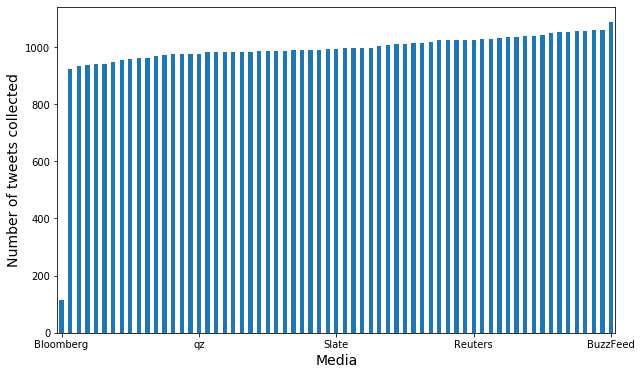

In [5]:
temp =media_bias.reset_index(drop=True)
ct = df.groupby('user_screen_name').count()
ct = ct.sort_values(by=['text'])
ax = ct.plot(y='text', kind='bar', xticks=[0,1], legend = False, rot=0, figsize=(10, 6))
ax.set_xticks([0,16,32,48,64])
ax.set_xticklabels(ct.index[0:65:16])
ax.set_xlabel("Media", fontsize = 14)
ax.set_ylabel("Number of tweets collected",  fontsize = 14)

In [6]:
table = temp.set_index('Source').join(ct)
table = table.drop(columns = ['bias', 'quality'])
table.rename(columns={"text": "Tweet Count"})
print(table.to_latex(float_format="%.2f") ) 

\begin{tabular}{lrrr}
\toprule
{} &   Bias &  Quality &  text \\
Source          &        &          &       \\
\midrule
ABC             &  -1.85 &    49.87 &  1041 \\
AP              &  -1.06 &    52.19 &  1029 \\
axios           &  -5.74 &    47.30 &   982 \\
BBC             &  -3.03 &    46.27 &  1005 \\
Bloomberg       &  -0.85 &    47.52 &   115 \\
BreitbartNews   &  18.99 &    30.64 &   985 \\
businessinsider &  -0.38 &    43.28 &   984 \\
BuzzFeed        &  -7.06 &    43.17 &  1087 \\
CBSNews         &  -1.85 &    46.84 &   938 \\
CNN             &  -8.55 &    40.49 &  1012 \\
cnsnews         &  25.75 &    27.75 &  1023 \\
csmonitor       &  -0.21 &    44.27 &   992 \\
thedailybeast   & -12.04 &    38.80 &  1055 \\
DailyCaller     &  20.06 &    28.80 &   996 \\
DailySignal     &  19.97 &    30.41 &   997 \\
democracynow    & -16.71 &    37.54 &   974 \\
FT              &   0.62 &    47.47 &   935 \\
TheFiscalTimes  &   1.52 &    44.54 &   984 \\
Forbes          &   0.20 &    39.

In [7]:
# Some interesting tweets: "House Republicans: Maybe Trump actually toxic"
stop_words = stopwords.words('english')
number_strs = ['one', 'two', 'three', 'four', 'five', 'six', 'seven','eight', 'nine', 'ten']
stop_words.extend(number_strs)
clean_c = lambda x: clean_comment(x)
X = list(map(clean_c, df.text))

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
vectorizer = CountVectorizer(min_df = 0.0002)
bag_of_words = vectorizer.fit_transform(X)
bag_of_words.shape

(64127, 6935)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X_train, X_test, yb_train, yb_test = train_test_split(bag_of_words, df.bias, test_size=0.8,shuffle=False)
regr1 = make_pipeline(StandardScaler(with_mean=False), LinearSVR(random_state=0, tol=1e-4,max_iter=1000))
regr1.fit(X_train, yb_train)
bias_pred = regr1.predict(X_test)

X_train, X_test, yq_train, yq_test = train_test_split(bag_of_words, df.quality, test_size=0.8,shuffle=False)
regr2 = make_pipeline(StandardScaler(with_mean=False), LinearSVR(random_state=0, tol=1e-4,max_iter=1000))
regr2.fit(X_train, yq_train)
qual_pred = regr2.predict(X_test)

import scipy
df_test = df.tail(X_test.shape[0]).copy()
df_test['bias_pred'] = bias_pred
df_test['qual_pred'] = qual_pred
df_gb = df_test.groupby(['user_screen_name'])
corr_bias = scipy.stats.pearsonr(df_gb.bias_pred.mean().tolist(), df_gb.bias.mean().tolist())[0]
corr_quality = scipy.stats.pearsonr(df_gb.qual_pred.mean().tolist(), df_gb.quality.mean().tolist())[0]
(corr_bias,corr_quality)

C:\Users\zchao\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zchao\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(0.9122686369802118, 0.9200201406103046)

In [43]:
from sklearn.neural_network import MLPRegressor
regr1 = MLPRegressor(hidden_layer_sizes=10, shuffle=False, random_state=1).fit(X_train, yb_train)
bias_pred = regr1.predict(X_test)

regr2 = MLPRegressor(hidden_layer_sizes=10, shuffle=False, random_state=1).fit(X_train, yq_train)
qual_pred = regr2.predict(X_test)

df_test = df.tail(X_test.shape[0]).copy()
df_test['bias_pred'] = bias_pred
df_test['qual_pred'] = qual_pred
# df_gb = df_test.groupby(['user_screen_name'])
# corr_bias = scipy.stats.pearsonr(df_gb.bias_pred.mean().tolist(), df_gb.bias.mean().tolist())[0]
# corr_quality = scipy.stats.pearsonr(df_gb.qual_pred.mean().tolist(), df_gb.quality.mean().tolist())[0]
# (corr_bias,corr_quality)
average_bias = df_test.groupby(['user_screen_name']).bias_pred.mean()
average_qual = df_test.groupby(['user_screen_name']).qual_pred.mean()
bias = df_test.groupby(['user_screen_name']).bias.mean()
quality = df_test.groupby(['user_screen_name']).quality.mean()

corr_bias = scipy.stats.pearsonr(average_bias.tolist(), bias.tolist())[0]
corr_quality = scipy.stats.pearsonr(average_qual.tolist(), quality.tolist())[0]

print(corr_bias, corr_quality)

0.9549296039972578 0.9343518009473037


In [39]:
from sklearn.tree import DecisionTreeRegressor
regr1 = DecisionTreeRegressor(random_state=1, max_depth = 100).fit(X_train, yb_train)
bias_pred = regr1.predict(X_test)

regr2 = DecisionTreeRegressor(random_state=1, max_depth = 100).fit(X_train, yq_train)
qual_pred = regr2.predict(X_test)

df_test = df.tail(X_test.shape[0]).copy()
df_test['bias_pred'] = bias_pred
df_test['qual_pred'] = qual_pred
df_gb = df_test.groupby(['user_screen_name'])

corr_bias = scipy.stats.pearsonr(df_gb.bias_pred.mean().tolist(), df_gb.bias.mean().tolist())[0]
corr_quality = scipy.stats.pearsonr(df_gb.qual_pred.mean().tolist(), df_gb.quality.mean().tolist())[0]
(corr_bias,corr_quality)

(0.881902854537286, 0.8689521273376068)

In [40]:
from sklearn.ensemble import RandomForestRegressor
regr1 = RandomForestRegressor(n_estimators=10).fit(X_train, yb_train)
bias_pred = regr1.predict(X_test)

regr2 = RandomForestRegressor(n_estimators=10).fit(X_train, yq_train)
qual_pred = regr2.predict(X_test)

df_test = df.tail(X_test.shape[0]).copy()
df_test['bias_pred'] = bias_pred
df_test['qual_pred'] = qual_pred
df_gb = df_test.groupby(['user_screen_name'])

corr_bias = scipy.stats.pearsonr(df_gb.bias_pred.mean().tolist(), df_gb.bias.mean().tolist())[0]
corr_quality = scipy.stats.pearsonr(df_gb.qual_pred.mean().tolist(), df_gb.quality.mean().tolist())[0]
(corr_bias,corr_quality)

(0.922434275097791, 0.9035343866513003)

C:\Users\zchao\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zchao\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zchao\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\zchao\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

(0.8888102932213924, 0.8935206974959833)